In [1]:
import cv2
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as signal
from pathlib import Path
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from scipy.signal import medfilt
from scipy.signal import sosfiltfilt, butter


import sys
sys.path.append("../src")
from conversion_mat_to_py import mat2dict, pretty_dict, matobj2dict, dict2ntuple, name_data
from sources_cv2 import defineStartEnd, count_frames
from save_datas import save_data
from data_conversions import acc_to_angle
from filters import filter_butter
from plots import spectrum_periodogram_complete, spectrum_periodogram, spectrum_periodogram_reduced, plot_filter_butter, plot_comp_filter

# -> Escolher os voluntários e chaves

* Voluntário => 1 até 90
* Chaves => 'S1_Synched', 'S2_Synched', 'I1', 'I2', 'S1', 'S2'

In [2]:
''' Alterar o número do voluntário  1 '''

voluntary_1 = 23
key_1 = 'S1_Synched'

voluntary_1 = str(voluntary_1)

''' Alterar o número do voluntário 2'''

voluntary_2 = 52
key_2 = 'S1_Synched'

voluntary_2 = str(voluntary_2)

''' Alterar o número do voluntário 3'''

voluntary_3 = 6
key_3 = 'S1_Synched'

voluntary_3 = str(voluntary_3)

''' Alterar o número do voluntário 4'''

voluntary_4 = 68
key_4 = 'S1_Synched'

voluntary_4 = str(voluntary_4)

''' Alterar o número do voluntário 5'''

voluntary_5 = 85
key_5 = 'S1_Synched'

voluntary_5 = str(voluntary_5)


In [10]:
data_1 = pd.read_csv(data_path + archive_1, sep = ';')
data_2 = pd.read_csv(data_path + archive_2, sep = ';')
data_3 = pd.read_csv(data_path + archive_3, sep = ';')
data_4 = pd.read_csv(data_path + archive_4, sep = ';')
data_5 = pd.read_csv(data_path + archive_5, sep = ';')

# Definindo a frequência de amostragem
freq_amostragem = 120

FileNotFoundError: [Errno 2] No such file or directory: '/Users/User/OneDrive/TCC/ema_motion_analysis_imu/data/S1_Subject_23_Synched_Sit_and_Stand.csv'

# Apresentando o espectrograma das amostras

In [ ]:
''' Substituir o número do dado para apresentar o espctro de todos os dados do voluntário'''
spectrum_periodogram_complete(data_3, freq_amostragem, grafico = 'pot_log', save = False)

### Separando os dados dos 5 exemplos para a perna direita

- Visualizar a densidade espectral de potência dos 5 exemplos
- Aplicar filtro com diferentes frequências de corte(0.5 Hz, 1 Hz, 2 Hz, 3 Hz) para os 5 exemplos
- Aplicar a conversão para angulo dos dados filtrados e não filtrados
- Visualizar a diferença de cada exemplo para as freqências de corte selecionadas em relação aos dados não filtrados

In [ ]:
#plt.plot(RightUpLeg_3)
f_name = 'C:/Users/User/OneDrive/TCC/ema_motion_analysis_imu/Imagens/'

    #plt.figure(figsize=[15,8])

plt.plot(t_right_up_leg_3, RightUpLeg_3_filter_3Hz[:,0], label = 'Eixo X')
plt.plot(t_right_up_leg_3, RightUpLeg_3_filter_3Hz[:,1], label = 'Eixo Y')
plt.plot(t_right_up_leg_3, RightUpLeg_3_filter_3Hz[:,2], label = 'Eixo Z')
plt.xlabel('Tempo (s)')
plt.ylabel('Aceleração (g)')
plt.legend()
#plt.title(title)
plt.grid()
plt.savefig(f_name + 'Aceleração_3Hz' + '.png')
plt.show()

In [ ]:
# Separar os dados da perna direita de cada voluntário
RightUpLeg_1 = data_1.iloc[:,3:6].values
RightUpLeg_2 = data_2.iloc[:,3:6].values
RightUpLeg_3 = data_3.iloc[:,3:6].values
RightUpLeg_4 = data_4.iloc[:,3:6].values
RightUpLeg_5 = data_5.iloc[:,3:6].values

In [ ]:
# Apresentar o Spectrograma de cada voluntário
spectrum_periodogram(RightUpLeg_1, freq_amostragem, title = 'Perna Direita - Voluntário 1')
spectrum_periodogram(RightUpLeg_2, freq_amostragem, title = 'Perna Direita - Voluntário 2')
spectrum_periodogram(RightUpLeg_3, freq_amostragem, title = 'Perna Direita - Voluntário 3')
spectrum_periodogram(RightUpLeg_4, freq_amostragem, title = 'Perna Direita - Voluntário 4')
spectrum_periodogram(RightUpLeg_5, freq_amostragem, title = 'Perna Direita - Voluntário 5')

Dessa forma, foi possível observar que a frequência que representa o sinal está entre 0 Hz e 3 Hz. 

Agora será aplicado os filtros selecionados para teste para os 5 sinais, em seguida será feita a conversão para ângulo e a apresentação dos dados em comparação com os dados não filtrados. 

In [ ]:
# Definindo a ordem do filtro 
ordem = 2


# Aplicando filtro com frequência de corte em 0.5 Hz para as 5 amostras
RightUpLeg_1_filter_05Hz = filter_butter(RightUpLeg_1, ordem, 0.5, freq_amostragem)
RightUpLeg_2_filter_05Hz = filter_butter(RightUpLeg_2, ordem, 0.5, freq_amostragem)
RightUpLeg_3_filter_05Hz = filter_butter(RightUpLeg_3, ordem, 0.5, freq_amostragem)
RightUpLeg_4_filter_05Hz = filter_butter(RightUpLeg_4, ordem, 0.5, freq_amostragem)
RightUpLeg_5_filter_05Hz = filter_butter(RightUpLeg_5, ordem, 0.5, freq_amostragem)

# Aplicando filtro com frequência de corte em 1 Hz para as 5 amostras
RightUpLeg_1_filter_1Hz = filter_butter(RightUpLeg_1, ordem, 1, freq_amostragem)
RightUpLeg_2_filter_1Hz = filter_butter(RightUpLeg_2, ordem, 1, freq_amostragem)
RightUpLeg_3_filter_1Hz = filter_butter(RightUpLeg_3, ordem, 1, freq_amostragem)
RightUpLeg_4_filter_1Hz = filter_butter(RightUpLeg_4, ordem, 1, freq_amostragem)
RightUpLeg_5_filter_1Hz = filter_butter(RightUpLeg_5, ordem, 1, freq_amostragem)

# Aplicando filtro com frequência de corte em 2 Hz para as 5 amostras
RightUpLeg_1_filter_2Hz = filter_butter(RightUpLeg_1, ordem, 2, freq_amostragem)
RightUpLeg_2_filter_2Hz = filter_butter(RightUpLeg_2, ordem, 2, freq_amostragem)
RightUpLeg_3_filter_2Hz = filter_butter(RightUpLeg_3, ordem, 2, freq_amostragem)
RightUpLeg_4_filter_2Hz = filter_butter(RightUpLeg_4, ordem, 2, freq_amostragem)
RightUpLeg_5_filter_2Hz = filter_butter(RightUpLeg_5, ordem, 2, freq_amostragem)

# Aplicando filtro com frequência de corte em 3 Hz para as 5 amostras
RightUpLeg_1_filter_3Hz = filter_butter(RightUpLeg_1, ordem, 3, freq_amostragem)
RightUpLeg_2_filter_3Hz = filter_butter(RightUpLeg_2, ordem, 3, freq_amostragem)
RightUpLeg_3_filter_3Hz = filter_butter(RightUpLeg_3, ordem, 3, freq_amostragem)
RightUpLeg_4_filter_3Hz = filter_butter(RightUpLeg_4, ordem, 3, freq_amostragem)
RightUpLeg_5_filter_3Hz = filter_butter(RightUpLeg_5, ordem, 3, freq_amostragem)


Aplicando a conversão dos dados do acelerômetro para ângulos

In [5]:
# Aplicando a conversão dos dados de aceleração para ângulos.
angle_rad_RightUpLeg_1, angle_RightUpLeg_1 = acc_to_angle(RightUpLeg_1)
angle_rad_RightUpLeg_2, angle_RightUpLeg_2 = acc_to_angle(RightUpLeg_2)
angle_rad_RightUpLeg_3, angle_RightUpLeg_3 = acc_to_angle(RightUpLeg_3)
angle_rad_RightUpLeg_4, angle_RightUpLeg_4 = acc_to_angle(RightUpLeg_4)
angle_rad_RightUpLeg_5, angle_RightUpLeg_5 = acc_to_angle(RightUpLeg_5)

# Aplicando a conversão dos dados de aceleração filtrados em 0.5 Hz para ângulos.
angle_rad_RightUpLeg_1_filter_05Hz, angle_RightUpLeg_1_filter_05Hz = acc_to_angle(RightUpLeg_1_filter_05Hz)
angle_rad_RightUpLeg_2_filter_05Hz, angle_RightUpLeg_2_filter_05Hz = acc_to_angle(RightUpLeg_2_filter_05Hz)
angle_rad_RightUpLeg_3_filter_05Hz, angle_RightUpLeg_3_filter_05Hz = acc_to_angle(RightUpLeg_3_filter_05Hz)
angle_rad_RightUpLeg_4_filter_05Hz, angle_RightUpLeg_4_filter_05Hz = acc_to_angle(RightUpLeg_4_filter_05Hz)
angle_rad_RightUpLeg_5_filter_05Hz, angle_RightUpLeg_5_filter_05Hz = acc_to_angle(RightUpLeg_5_filter_05Hz)

# Aplicando a conversão dos dados de aceleração filtrados em 1 Hz para ângulos.
angle_rad_RightUpLeg_1_filter_1Hz, angle_RightUpLeg_1_filter_1Hz = acc_to_angle(RightUpLeg_1_filter_1Hz)
angle_rad_RightUpLeg_2_filter_1Hz, angle_RightUpLeg_2_filter_1Hz = acc_to_angle(RightUpLeg_2_filter_1Hz)
angle_rad_RightUpLeg_3_filter_1Hz, angle_RightUpLeg_3_filter_1Hz = acc_to_angle(RightUpLeg_3_filter_1Hz)
angle_rad_RightUpLeg_4_filter_1Hz, angle_RightUpLeg_4_filter_1Hz = acc_to_angle(RightUpLeg_4_filter_1Hz)
angle_rad_RightUpLeg_5_filter_1Hz, angle_RightUpLeg_5_filter_1Hz = acc_to_angle(RightUpLeg_5_filter_1Hz)

# Aplicando a conversão dos dados de aceleração filtrados em 2 Hz para ângulos.
angle_rad_RightUpLeg_1_filter_2Hz, angle_RightUpLeg_1_filter_2Hz = acc_to_angle(RightUpLeg_1_filter_2Hz)
angle_rad_RightUpLeg_2_filter_2Hz, angle_RightUpLeg_2_filter_2Hz = acc_to_angle(RightUpLeg_2_filter_2Hz)
angle_rad_RightUpLeg_3_filter_2Hz, angle_RightUpLeg_3_filter_2Hz = acc_to_angle(RightUpLeg_3_filter_2Hz)
angle_rad_RightUpLeg_4_filter_2Hz, angle_RightUpLeg_4_filter_2Hz = acc_to_angle(RightUpLeg_4_filter_2Hz)
angle_rad_RightUpLeg_5_filter_2Hz, angle_RightUpLeg_5_filter_2Hz = acc_to_angle(RightUpLeg_5_filter_2Hz)

# Aplicando a conversão dos dados de aceleração filtrados em 3 Hz para ângulos.
angle_rad_RightUpLeg_1_filter_3Hz, angle_RightUpLeg_1_filter_3Hz = acc_to_angle(RightUpLeg_1_filter_3Hz)
angle_rad_RightUpLeg_2_filter_3Hz, angle_RightUpLeg_2_filter_3Hz = acc_to_angle(RightUpLeg_2_filter_3Hz)
angle_rad_RightUpLeg_3_filter_3Hz, angle_RightUpLeg_3_filter_3Hz = acc_to_angle(RightUpLeg_3_filter_3Hz)
angle_rad_RightUpLeg_4_filter_3Hz, angle_RightUpLeg_4_filter_3Hz = acc_to_angle(RightUpLeg_4_filter_3Hz)
angle_rad_RightUpLeg_5_filter_3Hz, angle_RightUpLeg_5_filter_3Hz = acc_to_angle(RightUpLeg_5_filter_3Hz)


NameError: name 'RightUpLeg_1' is not defined

In [6]:
# Criando vetor de tempo
t_right_up_leg_1 = np.linspace(0, len(angle_RightUpLeg_1) / freq_amostragem, len(angle_RightUpLeg_1))
t_right_up_leg_2 = np.linspace(0, len(angle_RightUpLeg_2) / freq_amostragem, len(angle_RightUpLeg_2))
t_right_up_leg_3 = np.linspace(0, len(angle_RightUpLeg_3) / freq_amostragem, len(angle_RightUpLeg_3))
t_right_up_leg_4 = np.linspace(0, len(angle_RightUpLeg_4) / freq_amostragem, len(angle_RightUpLeg_4))
t_right_up_leg_5 = np.linspace(0, len(angle_RightUpLeg_5) / freq_amostragem, len(angle_RightUpLeg_5))

NameError: name 'angle_RightUpLeg_1' is not defined

## Apresentação das respostas para os dados de 5 voluntários com a aplicação de 4 filtros com frequências de cortes diferentes

In [7]:
# Aplicando o filtro e apresentado os dados comparando com os dados originais
# 0.5 Hz
plot_filter_butter(ordem, 0.5)
plot_comp_filter(t_right_up_leg_1, angle_RightUpLeg_1, angle_RightUpLeg_1_filter_05Hz, title='Filtro em 0.5 Hz - Perna Direita 1')
plot_comp_filter(t_right_up_leg_2, angle_RightUpLeg_2, angle_RightUpLeg_2_filter_05Hz, title='Filtro em 0.5 Hz - Perna Direita 2')
plot_comp_filter(t_right_up_leg_3, angle_RightUpLeg_3, angle_RightUpLeg_3_filter_05Hz, title='Filtro em 0.5 Hz - Perna Direita 3')
plot_comp_filter(t_right_up_leg_4, angle_RightUpLeg_4, angle_RightUpLeg_4_filter_05Hz, title='Filtro em 0.5 Hz - Perna Direita 4')
plot_comp_filter(t_right_up_leg_5, angle_RightUpLeg_5, angle_RightUpLeg_5_filter_05Hz, title='Filtro em 0.5 Hz - Perna Direita 5')

NameError: name 'ordem' is not defined

In [8]:
# Aplicando o filtro e apresentado os dados comparando com os dados originais
# 1 Hz
plot_filter_butter(ordem, 1)
plot_comp_filter(t_right_up_leg_1, angle_RightUpLeg_1, angle_RightUpLeg_1_filter_1Hz, title='Filtro em 1 Hz - Perna Direita 1')
plot_comp_filter(t_right_up_leg_2, angle_RightUpLeg_2, angle_RightUpLeg_2_filter_1Hz, title='Filtro em 1 Hz - Perna Direita 2')
plot_comp_filter(t_right_up_leg_3, angle_RightUpLeg_3, angle_RightUpLeg_3_filter_1Hz, title='Filtro em 1 Hz - Perna Direita 3')
plot_comp_filter(t_right_up_leg_4, angle_RightUpLeg_4, angle_RightUpLeg_4_filter_1Hz, title='Filtro em 1 Hz - Perna Direita 4')
plot_comp_filter(t_right_up_leg_5, angle_RightUpLeg_5, angle_RightUpLeg_5_filter_1Hz, title='Filtro em 1 Hz - Perna Direita 5')

NameError: name 'ordem' is not defined

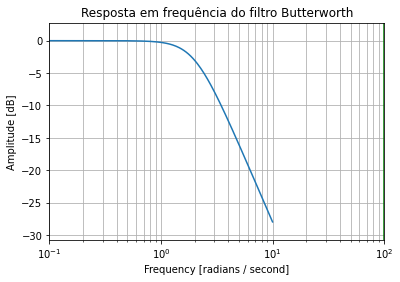

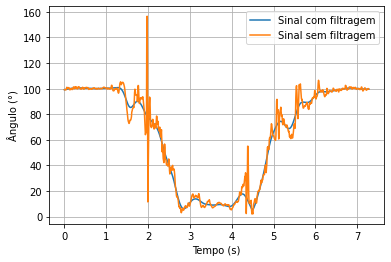

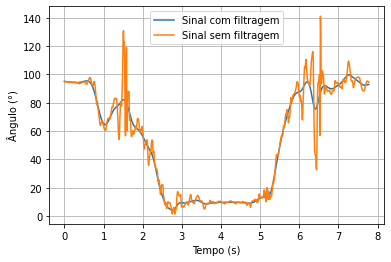

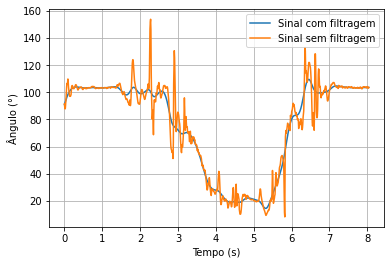

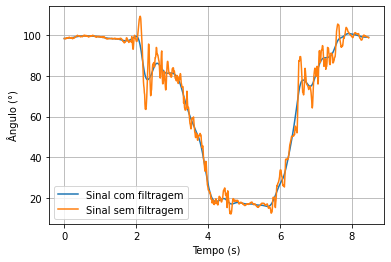

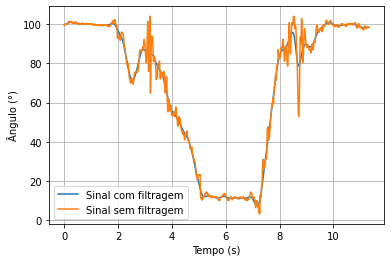

In [82]:
# Aplicando o filtro e apresentado os dados comparando com os dados originais
# 2 Hz
plot_filter_butter(ordem, 2)
plot_comp_filter(t_right_up_leg_1, angle_RightUpLeg_1, angle_RightUpLeg_1_filter_2Hz, title='Filtro em 2 Hz - Perna Direita 1')
plot_comp_filter(t_right_up_leg_2, angle_RightUpLeg_2, angle_RightUpLeg_2_filter_2Hz, title='Filtro em 2 Hz - Perna Direita 2')
plot_comp_filter(t_right_up_leg_3, angle_RightUpLeg_3, angle_RightUpLeg_3_filter_2Hz, title='Filtro em 2 Hz - Perna Direita 3', save = True)
plot_comp_filter(t_right_up_leg_4, angle_RightUpLeg_4, angle_RightUpLeg_4_filter_2Hz, title='Filtro em 2 Hz - Perna Direita 4')
plot_comp_filter(t_right_up_leg_5, angle_RightUpLeg_5, angle_RightUpLeg_5_filter_2Hz, title='Filtro em 2 Hz - Perna Direita 5')

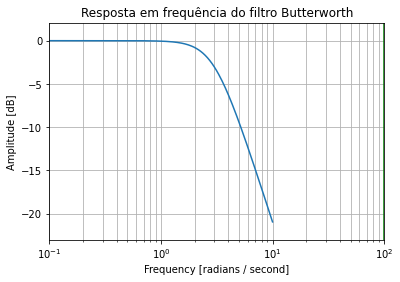

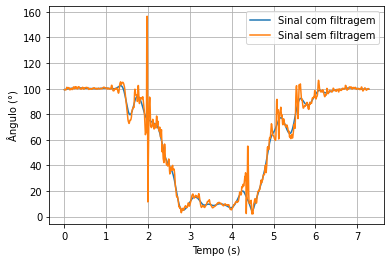

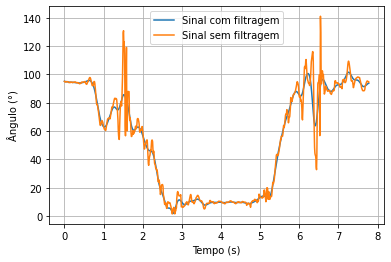

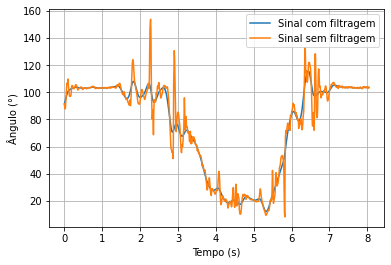

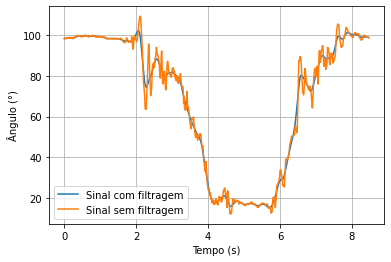

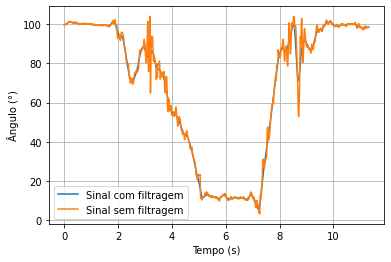

In [51]:
# Aplicando o filtro e apresentado os dados comparando com os dados originais
# 3 Hz
plot_filter_butter(ordem, 3)
plot_comp_filter(t_right_up_leg_1, angle_RightUpLeg_1, angle_RightUpLeg_1_filter_3Hz, title='Filtro em 3 Hz - Perna Direita 1')
plot_comp_filter(t_right_up_leg_2, angle_RightUpLeg_2, angle_RightUpLeg_2_filter_3Hz, title='Filtro em 3 Hz - Perna Direita 2')
plot_comp_filter(t_right_up_leg_3, angle_RightUpLeg_3, angle_RightUpLeg_3_filter_3Hz, title='Filtro em 3 Hz - Perna Direita 3', save = True)
plot_comp_filter(t_right_up_leg_4, angle_RightUpLeg_4, angle_RightUpLeg_4_filter_3Hz, title='Filtro em 3 Hz - Perna Direita 4')
plot_comp_filter(t_right_up_leg_5, angle_RightUpLeg_5, angle_RightUpLeg_5_filter_3Hz, title='Filtro em 3 Hz - Perna Direita 5')

# Refinar a escolha do filtro

### Apresentar o espectrograma reduzido (até 5 Hz) para os dados que serão utilizados (Pescoço, Perna direita e Perna Esquerda).

In [39]:
# Separar os dados do pescoço de cada voluntário
Spine_1 = data_1.iloc[:,15:18].values
Spine_2 = data_2.iloc[:,15:18].values
Spine_3 = data_3.iloc[:,15:18].values
Spine_4 = data_4.iloc[:,15:18].values
Spine_5 = data_5.iloc[:,15:18].values

# Separar os dados da perna esquerda de cada voluntário
LeftUpLeg_1 = data_1.iloc[:,6:9].values
LeftUpLeg_2 = data_2.iloc[:,6:9].values
LeftUpLeg_3 = data_3.iloc[:,6:9].values
LeftUpLeg_4 = data_4.iloc[:,6:9].values
LeftUpLeg_5 = data_5.iloc[:,6:9].values

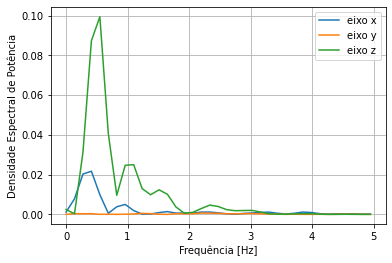

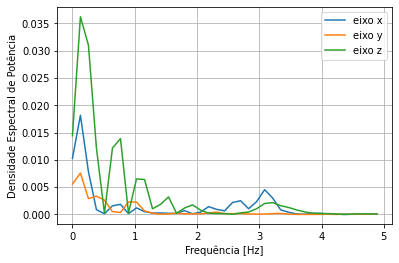

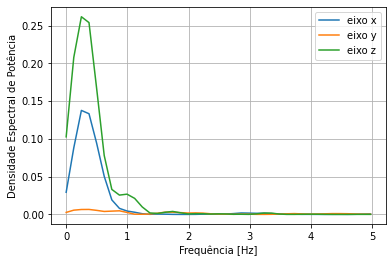

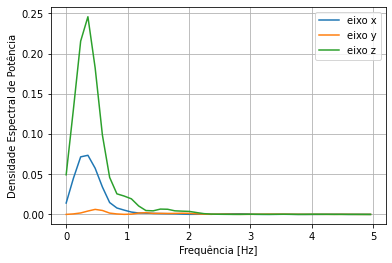

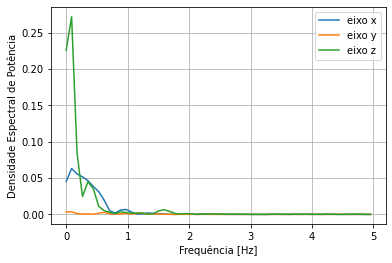

In [40]:
# Apresentar o Spectrograma da Perna Direita para cada voluntário
spectrum_periodogram_reduced(Spine_1, freq_amostragem, title = 'Tronco - Voluntário 1')
spectrum_periodogram_reduced(Spine_2, freq_amostragem, title = 'Tronco - Voluntário 2')
spectrum_periodogram_reduced(Spine_3, freq_amostragem, title = 'Tronco - Voluntário 3', save = False)
spectrum_periodogram_reduced(Spine_4, freq_amostragem, title = 'Tronco - Voluntário 4')
spectrum_periodogram_reduced(Spine_5, freq_amostragem, title = 'Tronco - Voluntário 5')

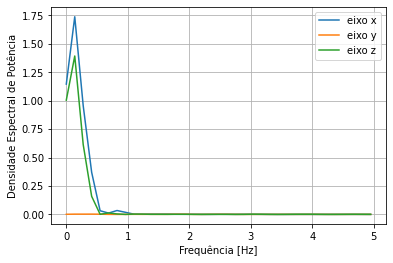

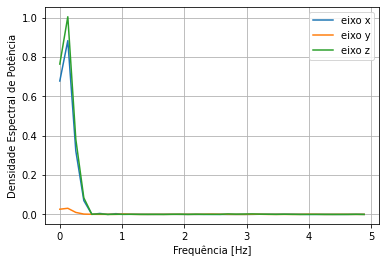

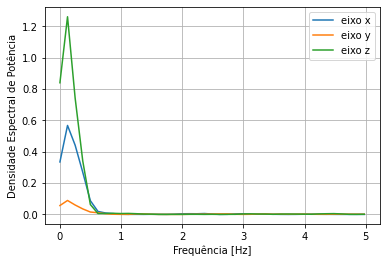

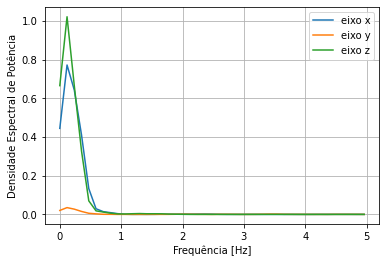

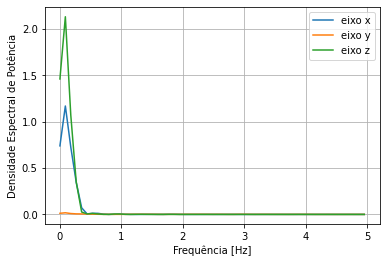

In [41]:
# Apresentar o Spectrograma da Perna Direita para cada voluntário
spectrum_periodogram_reduced(RightUpLeg_1, freq_amostragem, title = 'Perna Direita - Voluntário 1')
spectrum_periodogram_reduced(RightUpLeg_2, freq_amostragem, title = 'Perna Direita - Voluntário 2')
spectrum_periodogram_reduced(RightUpLeg_3, freq_amostragem, title = 'Perna Direita - Voluntário 3', save = False)
spectrum_periodogram_reduced(RightUpLeg_4, freq_amostragem, title = 'Perna Direita - Voluntário 4')
spectrum_periodogram_reduced(RightUpLeg_5, freq_amostragem, title = 'Perna Direita - Voluntário 5')

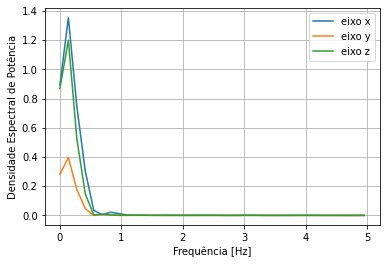

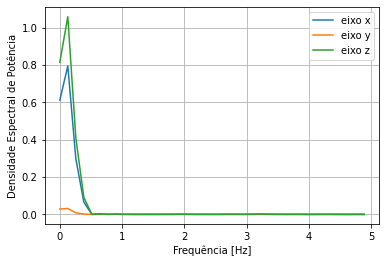

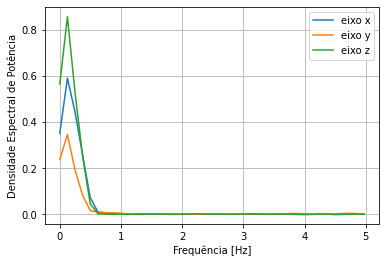

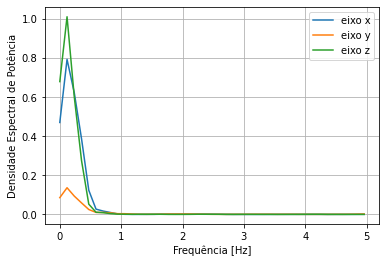

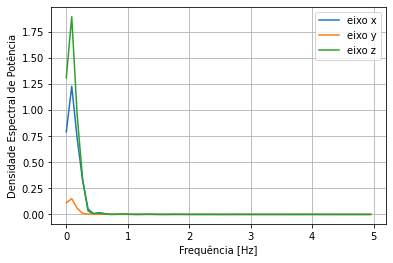

In [42]:
# Apresentar o Spectrograma da Perna Esquerda para cada voluntário
spectrum_periodogram_reduced(LeftUpLeg_1, freq_amostragem, title = 'Perna Esquerda - Voluntário 1')
spectrum_periodogram_reduced(LeftUpLeg_2, freq_amostragem, title = 'Perna Esquerda - Voluntário 2')
spectrum_periodogram_reduced(LeftUpLeg_3, freq_amostragem, title = 'Perna Esquerda - Voluntário 3', save = False)
spectrum_periodogram_reduced(LeftUpLeg_4, freq_amostragem, title = 'Perna Esquerda - Voluntário 4')
spectrum_periodogram_reduced(LeftUpLeg_5, freq_amostragem, title = 'Perna Esquerda - Voluntário 5')

Foi possível observar que as frequências que representam o sinal para o movimento de sentar e levantar é diferente para as pernas e para o pescoço. 
- Para as pernas, a densidade espectral de potência que representa o sinal fica entre 0 e 1 Hz. 
- Para o pescoço, a densidade espectral de potência que representa o sinal fica entre 0 e 3 Hz.

In [43]:
# Definindo a ordem do filtro 
ordem = 2

# Definindo frequência de corte do filtro 
freq_corte_Leg = 0.7
freq_corte_Spine = 1.3

In [44]:
# Aplicando filtro com frequência de corte do pescoço para as 5 amostras
Spine_1_filter = filter_butter(Spine_1, ordem, freq_corte_Spine, freq_amostragem)
Spine_2_filter = filter_butter(Spine_2, ordem, freq_corte_Spine, freq_amostragem)
Spine_3_filter = filter_butter(Spine_3, ordem, freq_corte_Spine, freq_amostragem)
Spine_4_filter = filter_butter(Spine_4, ordem, freq_corte_Spine, freq_amostragem)
Spine_5_filter = filter_butter(Spine_5, ordem, freq_corte_Spine, freq_amostragem)

# Aplicando filtro com frequência de corte da perna para as 5 amostras da perna direita
RightUpLeg_1_filter = filter_butter(RightUpLeg_1, ordem, freq_corte_Leg, freq_amostragem)
RightUpLeg_2_filter = filter_butter(RightUpLeg_2, ordem, freq_corte_Leg, freq_amostragem)
RightUpLeg_3_filter = filter_butter(RightUpLeg_3, ordem, freq_corte_Leg, freq_amostragem)
RightUpLeg_4_filter = filter_butter(RightUpLeg_4, ordem, freq_corte_Leg, freq_amostragem)
RightUpLeg_5_filter = filter_butter(RightUpLeg_5, ordem, freq_corte_Leg, freq_amostragem)

# Aplicando filtro com frequência de corte da perna para as 5 amostras da perna esquerda
LeftUpLeg_1_filter = filter_butter(LeftUpLeg_1, ordem, freq_corte_Leg, freq_amostragem)
LeftUpLeg_2_filter = filter_butter(LeftUpLeg_2, ordem, freq_corte_Leg, freq_amostragem)
LeftUpLeg_3_filter = filter_butter(LeftUpLeg_3, ordem, freq_corte_Leg, freq_amostragem)
LeftUpLeg_4_filter = filter_butter(LeftUpLeg_4, ordem, freq_corte_Leg, freq_amostragem)
LeftUpLeg_5_filter = filter_butter(LeftUpLeg_5, ordem, freq_corte_Leg, freq_amostragem)


In [45]:
# Aplicando a conversão dos dados de aceleração para ângulos para o pescoço.
angle_rad_Spine_1, angle_Spine_1 = acc_to_angle(Spine_1)
angle_rad_Spine_2, angle_Spine_2 = acc_to_angle(Spine_2)
angle_rad_Spine_3, angle_Spine_3 = acc_to_angle(Spine_3)
angle_rad_Spine_4, angle_Spine_4 = acc_to_angle(Spine_4)
angle_rad_Spine_5, angle_Spine_5 = acc_to_angle(Spine_5)

# Aplicando a conversão dos dados de aceleração para ângulos para a perna direita.
angle_rad_RightUpLeg_1, angle_RightUpLeg_1 = acc_to_angle(RightUpLeg_1)
angle_rad_RightUpLeg_2, angle_RightUpLeg_2 = acc_to_angle(RightUpLeg_2)
angle_rad_RightUpLeg_3, angle_RightUpLeg_3 = acc_to_angle(RightUpLeg_3)
angle_rad_RightUpLeg_4, angle_RightUpLeg_4 = acc_to_angle(RightUpLeg_4)
angle_rad_RightUpLeg_5, angle_RightUpLeg_5 = acc_to_angle(RightUpLeg_5)

# Aplicando a conversão dos dados de aceleração para ângulos para a perna esquerda.
angle_rad_LeftUpLeg_1, angle_LeftUpLeg_1 = acc_to_angle(LeftUpLeg_1)
angle_rad_LeftUpLeg_2, angle_LeftUpLeg_2 = acc_to_angle(LeftUpLeg_2)
angle_rad_LeftUpLeg_3, angle_LeftUpLeg_3 = acc_to_angle(LeftUpLeg_3)
angle_rad_LeftUpLeg_4, angle_LeftUpLeg_4 = acc_to_angle(LeftUpLeg_4)
angle_rad_LeftUpLeg_5, angle_LeftUpLeg_5 = acc_to_angle(LeftUpLeg_5)

# Aplicando a conversão dos dados de aceleração filtrados para ângulos para os dados do pescoço.
angle_rad_Spine_1_filter, angle_Spine_1_filter = acc_to_angle(Spine_1_filter)
angle_rad_Spine_2_filter, angle_Spine_2_filter = acc_to_angle(Spine_2_filter)
angle_rad_Spine_3_filter, angle_Spine_3_filter = acc_to_angle(Spine_3_filter)
angle_rad_Spine_4_filter, angle_Spine_4_filter = acc_to_angle(Spine_4_filter)
angle_rad_Spine_5_filter, angle_Spine_5_filter = acc_to_angle(Spine_5_filter)

# Aplicando a conversão dos dados de aceleração filtrados para ângulos para os dados da perna direita.
angle_rad_RightUpLeg_1_filter, angle_RightUpLeg_1_filter = acc_to_angle(RightUpLeg_1_filter)
angle_rad_RightUpLeg_2_filter, angle_RightUpLeg_2_filter = acc_to_angle(RightUpLeg_2_filter)
angle_rad_RightUpLeg_3_filter, angle_RightUpLeg_3_filter = acc_to_angle(RightUpLeg_3_filter)
angle_rad_RightUpLeg_4_filter, angle_RightUpLeg_4_filter = acc_to_angle(RightUpLeg_4_filter)
angle_rad_RightUpLeg_5_filter, angle_RightUpLeg_5_filter = acc_to_angle(RightUpLeg_5_filter)

# Aplicando a conversão dos dados de aceleração filtrados para ângulos para os dados da perna esquerda.
angle_rad_LeftUpLeg_1_filter, angle_LeftUpLeg_1_filter = acc_to_angle(LeftUpLeg_1_filter)
angle_rad_LeftUpLeg_2_filter, angle_LeftUpLeg_2_filter = acc_to_angle(LeftUpLeg_2_filter)
angle_rad_LeftUpLeg_3_filter, angle_LeftUpLeg_3_filter = acc_to_angle(LeftUpLeg_3_filter)
angle_rad_LeftUpLeg_4_filter, angle_LeftUpLeg_4_filter = acc_to_angle(LeftUpLeg_4_filter)
angle_rad_LeftUpLeg_5_filter, angle_LeftUpLeg_5_filter = acc_to_angle(LeftUpLeg_5_filter)

In [46]:
# Criando vetor de tempo
t_1 = np.linspace(0, len(angle_RightUpLeg_1) / freq_amostragem, len(angle_RightUpLeg_1))
t_2 = np.linspace(0, len(angle_RightUpLeg_2) / freq_amostragem, len(angle_RightUpLeg_2))
t_3 = np.linspace(0, len(angle_RightUpLeg_3) / freq_amostragem, len(angle_RightUpLeg_3))
t_4 = np.linspace(0, len(angle_RightUpLeg_4) / freq_amostragem, len(angle_RightUpLeg_4))
t_5 = np.linspace(0, len(angle_RightUpLeg_5) / freq_amostragem, len(angle_RightUpLeg_5))

# Criando título das imagens
title_Spine = 'Filtro em ' + str(freq_corte_Spine) + 'Hz'
title_Leg = 'Filtro em ' + str(freq_corte_Leg) + 'Hz'

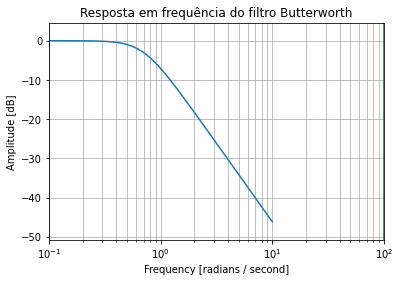

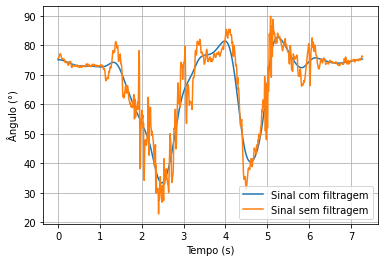

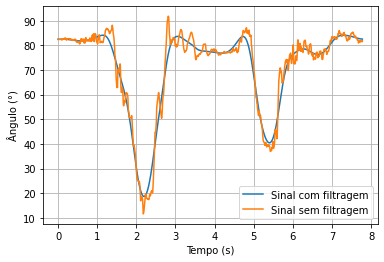

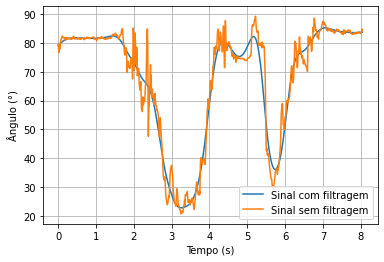

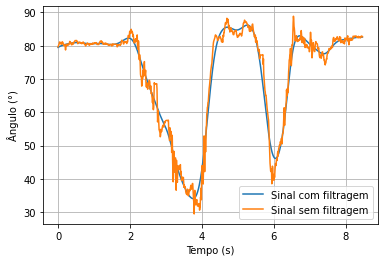

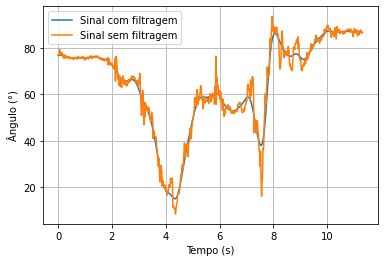

In [47]:
# Comparação dos dados com e sem filtro para o pescoço
plot_filter_butter(ordem, freq_corte_Leg)
plot_comp_filter(t_1, angle_Spine_1, angle_Spine_1_filter, title= title_Spine + ' - Tronco 1')
plot_comp_filter(t_2, angle_Spine_2, angle_Spine_2_filter, title= title_Spine + ' - Tronco 2', save = False)
plot_comp_filter(t_3, angle_Spine_3, angle_Spine_3_filter, title= title_Spine + ' - Tronco 3')
plot_comp_filter(t_4, angle_Spine_4, angle_Spine_4_filter, title= title_Spine + ' - Tronco 4')
plot_comp_filter(t_5, angle_Spine_5, angle_Spine_5_filter, title= title_Spine + ' - Tronco 5')

Assistindo os vídeos, é possível observar que as diferêncas de movimendos

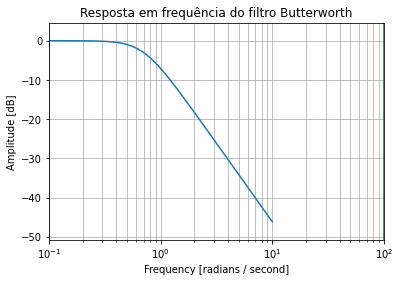

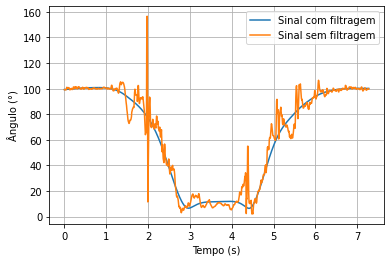

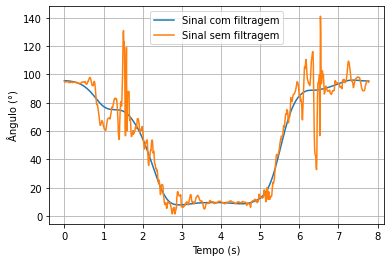

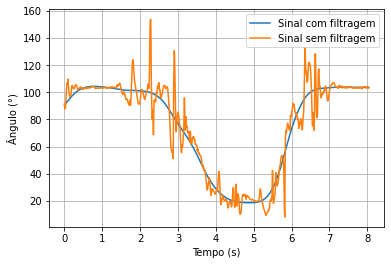

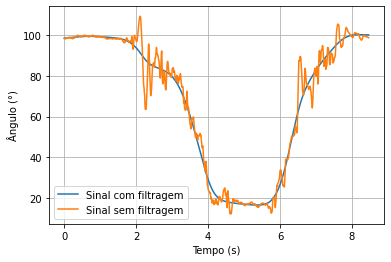

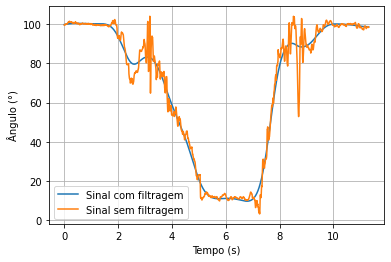

In [48]:
# Comparação dos dados com e sem filtro para a perna direita
plot_filter_butter(ordem, freq_corte_Leg)
plot_comp_filter(t_1, angle_RightUpLeg_1, angle_RightUpLeg_1_filter, title= title_Leg + ' - Perna Direita 1')
plot_comp_filter(t_2, angle_RightUpLeg_2, angle_RightUpLeg_2_filter, title= title_Leg + ' - Perna Direita 2', save = False)
plot_comp_filter(t_3, angle_RightUpLeg_3, angle_RightUpLeg_3_filter, title= title_Leg + ' - Perna Direita 3')
plot_comp_filter(t_4, angle_RightUpLeg_4, angle_RightUpLeg_4_filter, title= title_Leg + ' - Perna Direita 4')
plot_comp_filter(t_5, angle_RightUpLeg_5, angle_RightUpLeg_5_filter, title= title_Leg + ' - Perna Direita 5')

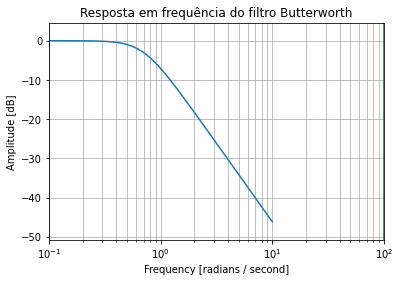

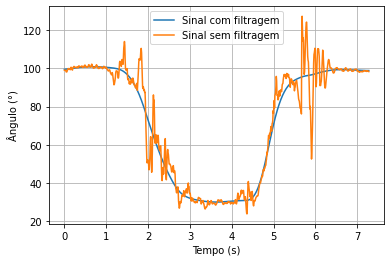

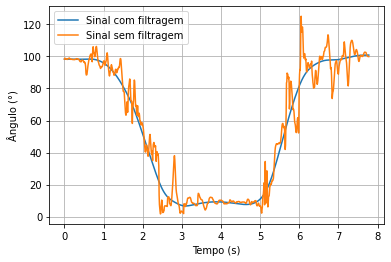

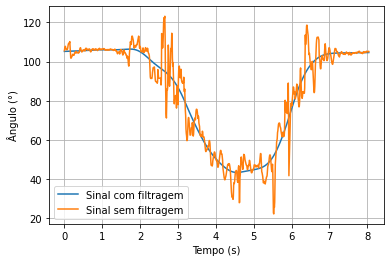

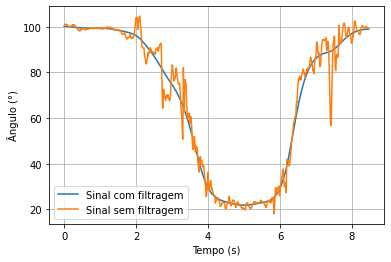

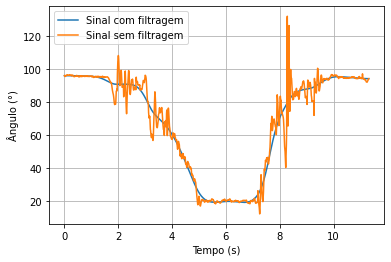

In [49]:
# Comparação dos dados com e sem filtro para a perna direita
plot_filter_butter(ordem, freq_corte_Leg)
plot_comp_filter(t_1, angle_LeftUpLeg_1, angle_LeftUpLeg_1_filter, title= title_Leg + ' - Perna Esquerda 1')
plot_comp_filter(t_2, angle_LeftUpLeg_2, angle_LeftUpLeg_2_filter, title= title_Leg + ' - Perna Esquerda 2', save = False)
plot_comp_filter(t_3, angle_LeftUpLeg_3, angle_LeftUpLeg_3_filter, title= title_Leg + ' - Perna Esquerda 3')
plot_comp_filter(t_4, angle_LeftUpLeg_4, angle_LeftUpLeg_4_filter, title= title_Leg + ' - Perna Esquerda 4')
plot_comp_filter(t_5, angle_LeftUpLeg_5, angle_LeftUpLeg_5_filter, title= title_Leg + ' - Perna Esquerda 5')

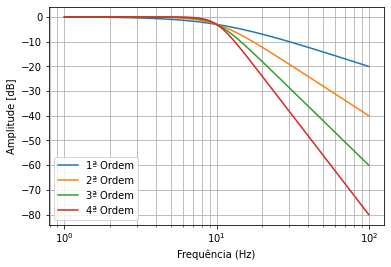

In [31]:
f_name = 'C:/Users/User/OneDrive/TCC/ema_motion_analysis_imu/Imagens/'
ordem = [1, 2, 3, 4]
freq_corte = 10

b, a = signal.butter(ordem[0], freq_corte, 'low', analog=True)
w, h = signal.freqs(b, a)
b1, a1 = signal.butter(ordem[1], freq_corte, 'low', analog=True)
w1, h1 = signal.freqs(b1, a1)
b2, a2 = signal.butter(ordem[2], freq_corte, 'low', analog=True)
w2, h2 = signal.freqs(b2, a2)
b3, a3 = signal.butter(ordem[3], freq_corte, 'low', analog=True)
w3, h3 = signal.freqs(b3, a3)


title = 'Resposta_freq_filtro_Butterworth'
#plt.figure(figsize=[15,8])
plt.semilogx(w, 20 * np.log10(abs(h)), label = '1ª Ordem')
plt.semilogx(w1, 20 * np.log10(abs(h1)), label = '2ª Ordem')
plt.semilogx(w2, 20 * np.log10(abs(h2)), label = '3ª Ordem')
plt.semilogx(w3, 20 * np.log10(abs(h3)), label = '4ª Ordem')
#plt.title(title)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude [dB]')
plt.legend()
#plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
#plt.axvline(100, color='green') # cutoff frequency
plt.savefig(f_name + title + '.png')
plt.show()